<a href="https://colab.research.google.com/github/jeremyfight/kittipod-Project/blob/main/Project_Lazada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and Inspecting Data

In [1]:
# Import library
import pandas as pd
import numpy as np

In [3]:
#Importไฟล์ csv
df=pd.read_csv('/content/sample_data/lazada_txn_clean.csv')

In [ ]:
# check ว่า dataframe มีทั้งหมดกี่ row กี่ column
df.shape

(2203, 20)

In [ ]:
#ให้ pandas เปลี่ยน type ของ column
df=df.convert_dtypes()

In [ ]:
#check ว่า dataframe มี column อะไรบ้างและเป็นประเภทอะไร
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_no                 2203 non-null   Int64  
 1   lazada_sku               2203 non-null   string 
 2   create_dt                2203 non-null   string 
 3   cust_name_hash           2203 non-null   string 
 4   shipping_name_hash       2203 non-null   string 
 5   shipping_addr_hash       2203 non-null   string 
 6   shipping_province        2203 non-null   string 
 7   shipping_district        2203 non-null   string 
 8   shipping_postcode        2203 non-null   Int64  
 9   tax_code_hash            2203 non-null   string 
 10  payment_method           2203 non-null   string 
 11  paid_price               2203 non-null   Float64
 12  unit_price               2203 non-null   Float64
 13  shipping_fee             2203 non-null   Float64
 14  item_name               

In [4]:
#เปลี่ยน type column  'create_dt' ให้เป็น datetime
df['create_dt'] = pd.to_datetime(df['create_dt'], format= '%Y %m %d %H:%M:%S')

In [5]:
#เรียงลำดับวันที่ในcolumn 'create_dt' จากน้อยไปมาก
df.sort_values(by='create_dt', inplace=True)

In [6]:
#ตัดเศษชั่วโมงนาที ออกจาก column 'create_dt'
df['create_dt']=df['create_dt'].dt.floor('D')

In [ ]:
df['create_dt']

0      2020-10-01
1      2020-10-01
2      2020-10-01
3      2020-10-01
4      2020-10-01
          ...    
2196   2020-12-24
2198   2020-12-24
2199   2020-12-24
2200   2020-12-24
2202   2020-12-24
Name: create_dt, Length: 2026, dtype: datetime64[ns]

In [ ]:
#check ค่าสถิติของแต่ละcolumn ที่เป็นตัวเลข
df.describe()

,order_no,shipping_postcode,paid_price,unit_price,shipping_fee,shipping_fee_to_unit_price,cum_paid_price
count,2026.0,2026.0,2026.0,2026.0,2026.0,2026.0,2026.0
mean,339472339796962.25,45570.774926,418.483386,425.146249,114.972098,0.327822,422140.910064
std,6815537992694.380859,27167.597391,340.396734,348.181592,73.986854,0.167554,238596.653506
min,327742470082888.0,10100.0,14.77,15.0,0.0,0.0,930.0
25%,333668424294294.0,21130.0,170.0,175.0,58.325,0.234694,218824.995
50%,339807440382994.0,41130.0,245.0,250.0,109.0,0.294118,420852.51
75%,345321462284441.0,72150.0,712.5,750.0,170.0,0.415789,632972.47
max,351536392014839.0,94150.0,2111.18,2250.0,304.19,2.56,847847.34


# Viewing Columns

In [ ]:
#ดูcolumn item_name, item_category และ unit_price
df[['item_name','item_category','unit_price']]

,item_name,item_category,unit_price
0,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,สีรองพื้นปูนเก่า,930.0
1,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีฟ้า สีน้...,สีน้ำอะคริลิค,135.0
2,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีชมพู สีแ...,สีน้ำอะคริลิค,320.0
3,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,สีน้ำอะคริลิค,220.0
4,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,สีน้ำอะคริลิค,220.0
...,...,...,...
2198,สีทาบ้าน สีน้ำอะคริลิคทาภายใน ยี่ห้อ สคูลดิโอ ...,สีทาบ้าน,800.0
2199,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,สีทาบ้าน,750.0
2200,สีทาบ้าน สีน้ำอะครีลิคทาภายนอกและภายใน ขนาด 1/...,สีทาบ้าน,135.0
2201,สีทาบ้าน สีน้ำอะคริลิคทาภายใน ยี่ห้อ สคูลดิโอ ...,สีทาบ้าน,800.0


In [ ]:
#เรียกดูrowตำแหน่งที่ 100 ถึง 120 เอามา3 column แรก ด้วย .iloc[]
df.iloc[100:121,0:3]

,order_no,lazada_sku,create_dt
100,328278457912823,1014842789_TH-2239244868,2020-10-03 21:35:06
101,328327425662936,1000878324_TH-2192746942,2020-10-04 4:55:00
102,329078318751539,1000878324_TH-2192746942,2020-10-04 7:28:59
103,329074942171961,1009032228_TH-2227098198,2020-10-04 8:53:07
104,328365804579897,1009032228_TH-2227098198,2020-10-04 9:16:03
105,329111511842116,1004678096_TH-2215222123,2020-10-04 11:52:52
106,328418003617627,1018412591_TH-4250142343,2020-10-04 13:34:48
107,329136750591340,1012318716_TH-2233756416,2020-10-04 15:38:54
108,329148144436651,1008642852_TH-2795128808,2020-10-04 15:44:09
109,329164746349346,1000810167_TH-2192482713,2020-10-04 19:32:08


In [ ]:
#เรียกดู 10 rowแรก เอาcolumn shipping_province กับ shipping_district ด้วย .loc[]
df.loc[0:10,['shipping_province','shipping_district']]

,shipping_province,shipping_district
0,พระนครศรีอยุธยา/ Phra Nakhon Si Ayutthaya,วังน้อย/ Wang Noi
1,สมุทรปราการ/ Samut Prakan,บางพลี/ Bang Phli
2,ชุมพร/ Chumphon,ท่าแซะ/ Tha Sae
3,เชียงใหม่/ Chiang Mai,ฮอด/ Hot
4,เชียงใหม่/ Chiang Mai,ฮอด/ Hot
5,เชียงใหม่/ Chiang Mai,ฮอด/ Hot
6,ภูเก็ต/ Phuket,กะทู้/ Kathu
7,นครสวรรค์/ Nakhon Sawan,เมืองนครสวรรค์/ Mueang Nakhon Sawan
8,ภูเก็ต/ Phuket,กะทู้/ Kathu
9,ตรัง/ Trang,วังวิเศษ/ Wang Wiset


In [ ]:
#เรียกดูcolumnที่มี 'order_status' เป็น Canceled
df[df['order_status'] =='Canceled']

,order_no,lazada_sku,create_dt,cust_name_hash,shipping_name_hash,shipping_addr_hash,shipping_province,shipping_district,shipping_postcode,tax_code_hash,payment_method,paid_price,unit_price,shipping_fee,item_name,item_variation,item_category,order_status,cancel_return_initiator,cancel_return_reason
27,328612953664806,1000878324_TH-2192746938,2020-10-01 19:17:08,f60caac5d268a6ed0eae08bcab63dd8c,0d1b08c34858921bc7c662b228acb7ba,70c5a7e795497183e8cd21690750b067,มหาสารคาม/ Maha Sarakham,เมืองมหาสารคาม/ Mueang Maha Sarakham,44000,d41d8cd98f00b204e9800998ecf8427e,COD,95.0,95.0,64.0,สีน้ำอะครีลิคทาภายนอกและภายใน ขนาด 1/4 แกลลอน ...,"กลุ่มผลิตภัณฑ์สีทา:สีขาว, ปริมาณสี (L):1L",สีน้ำอะคริลิค,Canceled,cancellation-customer,คำสั่งซื้อซ้ำ
33,327894676309166,1232638433_TH-2954928494,2020-10-01 20:38:16,c792f4a3730650f27613a625a0d2b9bc,c792f4a3730650f27613a625a0d2b9bc,6cf179dd9d1199bcfe620404b175975e,กรุงเทพมหานคร/ Bangkok,สวนหลวง/ Suan Luang,10250,d41d8cd98f00b204e9800998ecf8427e,COD,500.0,500.0,109.0,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 467, ปริมาณสี (L):3.5L",สีน้ำอะคริลิค,Canceled,cancellation-customer,เปลี่ยนใจ
48,328089010135358,1229452655_TH-2941646434,2020-10-02 13:50:13,e34f6931921fa1e746f17cd02c2041d7,069cbefae1ad7f70c8b125390ad1a6c6,9533fd18eb4344ff597e5704f8cde65c,ปทุมธานี/ Pathum Thani,เมืองปทุมธานี/ Mueang Pathum Thani,12000,d41d8cd98f00b204e9800998ecf8427e,COD,950.0,950.0,230.0,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 435, ปริมาณสี (L):9L",สีน้ำอะคริลิค,Canceled,cancellation-customer,เปลี่ยนใจ
70,328171412728980,1008196581_TH-2224448934,2020-10-02 23:58:36,7f1fb95e26bf0e69fb2c58ed0a96221f,7a34cf93564c34c6168dc2155b271944,1749b43faaefa567412970c3c735607e,กาฬสินธุ์/ Kalasin,ห้วยผึ้ง/ Huai Phueng,46240,d41d8cd98f00b204e9800998ecf8427e,COD,230.0,230.0,134.0,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีชมพู สีแ...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 104, ปริมาณสี (L):3.5L",สีน้ำอะคริลิค,Canceled,cancellation-customer,เปลี่ยนที่อยู่ในการจัดส่ง
85,328965332588176,1008876044_TH-2226536503,2020-10-03 14:39:51,d6b85d46afe1d9cc6744a8b79e2cfc45,9f554ee34d19a2065eb32eae35cb6a8f,170943c75443a44fc0a3781bedf2ea14,เลย/ Loei,ภูกระดึง/ Phu Kradueng,42180,d41d8cd98f00b204e9800998ecf8427e,COD,780.0,780.0,230.0,สีรองพื้นปูนใหม่กันด่าง ยี่ห้อ สคูลดิโอ เกรดปร...,กลุ่มผลิตภัณฑ์สีทา:สีรองพื้นปูนใหม่,สีรองพื้นปูนใหม่กันด่าง,Canceled,cancellation-customer,เปลี่ยนใจ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,349887419470700,1012410273_TH-2233880685,2020-12-22 17:48:51,a96afc972f524627dd7b6f92f09df59f,a96afc972f524627dd7b6f92f09df59f,980017891ff67cf8a20f23aa810e7b5a,เชียงใหม่/ Chiang Mai,อมก๋อย/ Omkoi,50310,d41d8cd98f00b204e9800998ecf8427e,COD,180.0,180.0,64.0,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 127, ปริมาณสี (L):1L",สีทาบ้าน,Canceled,cancellation-customer,เปลี่ยนใจ
2156,351147768645738,1012410273_TH-2233880684,2020-12-23 12:32:47,af9f554e1aaaff11f3225dddb2660919,af9f554e1aaaff11f3225dddb2660919,f9c67738c5ca31b75a920880a128960b,ขอนแก่น/ Khon Kaen,เมืองขอนแก่น/ Mueang Khon Kaen,40260,d41d8cd98f00b204e9800998ecf8427e,COD,135.0,135.0,0.0,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 106, ปริมาณสี (L):1L",สีทาบ้าน,Canceled,cancellation-customer,เปลี่ยนใจ
2189,351482752499069,1012838520_TH-5212030381,2020-12-24 14:02:41,cc5abf089bcdd1b95c32c769aa296622,cc5abf089bcdd1b95c32c769aa296622,df19a9228785638b309a9884ef817f56,ร้อยเอ็ด/ Roi Et,ปทุมรัตต์/ Pathum Rat,45190,d41d8cd98f00b204e9800998ecf8427e,COD,171.0,180.0,39.5,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 168 เทาเข้ม, ปริมาณสี ...",สีทาบ้าน,Canceled,cancellation-customer,เปลี่ยนใจ
2197,350503072754315,1008184330_TH-2224336486,2020-12-24 19:07:53,cabe12d494f8011ee9a9d30d8b99d635,5917c95122796e170e38f79f7afe4704,e3704a127140213d8ea524d45ed9e54d,สมุทรสงคราม/ Samut Songkhram,บางคนที/ Bang Khonthi,75120,d41d8cd98f00b204

In [ ]:
#เรียกดูrowที่มี column 'item_category' เป็น 'สีทาบ้าน' และมี 'unit_price' เกิน 1000 บาท
df[(df['item_category']=='สีทาบ้าน') & (df['unit_price']>1000)].head(5)

,order_no,lazada_sku,create_dt,cust_name_hash,shipping_name_hash,shipping_addr_hash,shipping_province,shipping_district,shipping_postcode,tax_code_hash,...,paid_price,unit_price,shipping_fee,item_name,item_variation,item_category,order_status,cancel_return_initiator,cancel_return_reason,shipping_fee_to_unit_price
469,332453636262912,1004568813_TH-2266574218,2020-10-23 20:42:52,ec408f6e7f180cc0130d378c048c40db,48ba24749d1a9503858080498df79d99,9542313d583511568e862d97a2ee5024,ร้อยเอ็ด/ Roi Et,เชียงขวัญ/ Chiang Khwan,45000,d41d8cd98f00b204e9800998ecf8427e,...,1420.00,1450.0,230.00,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 168 เทาเข้ม, ปริมาณสี ...",สีทาบ้าน,Delivered,NaN,NaN,0.158621
490,333541905982497,1020578766_TH-2255890926,2020-10-25 10:38:23,43b633560f95a64dbe4ab5eef390d280,43b633560f95a64dbe4ab5eef390d280,2732d870caff2a3fa891a4e186e4c7d2,ราชบุรี/ Ratchaburi,สวนผึ้ง/ Suan Phueng,70180,d41d8cd98f00b204e9800998ecf8427e,...,1420.00,1450.0,230.00,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 108, ปริมาณสี (L):18L",สีทาบ้าน,Delivered,NaN,NaN,0.158621
600,334846905990817,1004568813_TH-2266574218,2020-10-30 15:12:57,512804638340b5c5d8aa1febb0bf4845,041491e092ede3791e809c9c52058168,a8eda9e3dadfb08395932b0fb97ecd35,ขอนแก่น/ Khon Kaen,บ้านไผ่/ Ban Phai,40110,d41d8cd98f00b204e9800998ecf8427e,...,1450.00,1450.0,230.00,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 168 เทาเข้ม, ปริมาณสี ...",สีทาบ้าน,Delivered,NaN,NaN,0.158621
694,334700872575531,1024016443_TH-2267566968,2020-11-03 12:02:34,ce85687454c110c6bce1af0d05df03c3,7a34cf93564c34c6168dc2155b271944,374d530d91447bbe350a9bec315a7e06,ระยอง/ Rayong,เมืองระยอง/ Mueang Rayong,21000,d41d8cd98f00b204e9800998ecf8427e,...,1428.25,1450.0,215.38,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 138, ปริมาณสี (L):18L",สีทาบ้าน,Delivered,NaN,NaN,0.148538
718,335776987230974,1004568813_TH-2266574218,2020-11-04 13:59:57,8d97b3e2a805a003584caa1ce6debffc,89f272ec6e0a8d441f2484adbbfb6955,b0e317dd6241d2f1e826ec61f8fb1e05,เชียงราย/ Chiang Rai,แม่สาย/ Mae Sai,57130,d41d8cd98f00b204e9800998ecf8427e,...,1450.00,1450.0,230.00,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 168 เทาเข้ม, ปริมาณสี ...",สีทาบ้าน,Delivered,NaN,NaN,0.158621


In [81]:
#ลอง **copy** เอาเฉพาะการสั่งซื้อที่ส่งไปยังจังหวัด 'ชุมพร/ Chumphon' ใส่ตัวแปร df_chumphon
df_chumphon=df[df['shipping_province']=='ชุมพร/ Chumphon'].copy()

In [82]:
df_chumphon.head(5)

,order_no,lazada_sku,create_dt,cust_name_hash,shipping_name_hash,shipping_addr_hash,shipping_province,shipping_district,shipping_postcode,tax_code_hash,...,paid_price,unit_price,shipping_fee,item_name,item_variation,item_category,order_status,cancel_return_initiator,cancel_return_reason,item_category_eng
2,327742470082888,1008196581_TH-2224448936,2020-10-01,a514aeb016b59badc71a021224659b9c,a514aeb016b59badc71a021224659b9c,9c93c5001632b526a1ef55a861bdfb2d,ชุมพร/ Chumphon,ท่าแซะ/ Tha Sae,86140,d41d8cd98f00b204e9800998ecf8427e,...,320.0,320.0,134.00,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีชมพู สีแ...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 108, ปริมาณสี (L):3.5L",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
103,329074942171961,1009032228_TH-2227098198,2020-10-04,c7892881176c69395aaf12191105a66e,041491e092ede3791e809c9c52058168,998f8100e61f25e4f5934c6be864a198,ชุมพร/ Chumphon,สวี/ Sawi,86130,d41d8cd98f00b204e9800998ecf8427e,...,450.0,450.0,170.00,ทินเนอร์ AAA 100% สำหรับแล็กเกอร์ เกรดพรีเมี่ย...,กลุ่มผลิตภัณฑ์สีทา:ทินเนอร์ AAA 100%,ทินเนอร์,Delivered,NaN,NaN,Tinner
480,332517438407630,1008184330_TH-2224336486,2020-10-24,e5cf6aa47f1a5f1cc1b871e858d2b534,800b7555eedd4b6195fdcf38bc1f3bd8,6a43f931dff97ddbff7a86547b51db3e,ชุมพร/ Chumphon,หลังสวน/ Lang Suan,86110,d41d8cd98f00b204e9800998ecf8427e,...,230.0,230.0,134.00,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 106, ปริมาณสี (L):3.5L",สีทาบ้าน,Delivered,NaN,NaN,House Paint
485,333398560402523,1004678096_TH-2215222121,2020-10-24,553511e72f55acc6d0b47d88bad0e260,3046643903304686fe9a089368d64c84,02b2cda0078f812c947a666e2b4cd70d,ชุมพร/ Chumphon,เมืองชุมพร/ Mueang Chumphon,86000,fd722ad9af333a81d6c898f4bed501aa,...,620.0,620.0,150.68,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 167 เทาอ่อน, ปริมาณสี ...",สีทาบ้าน,Delivered,NaN,NaN,House Paint
515,333039601578888,1004388157_TH-2214532981,2020-10-26,65f675b3cf48b79d1d4fe970f1688c6b,8fa8aaf9ecf83e48ad2814905fd7ca03,8820de989202ed0ee5d0539a1dc7b307,ชุมพร/ Chumphon,หลังสวน/ Lang Suan,86110,d41d8cd98f00b204e9800998ecf8427e,...,320.0,320.0,134.00,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 168 สีเทาเข้ม, ปริมาณส...",สีทาบ้าน,Delivered,NaN,NaN,House Paint


# Sorting data

In [83]:
#เรียงลำดับ paid_price จากน้อยไปมาก เพื่อดูการสั่งซื้อที่ลูกค้าจ่ายเงินน้อยๆ
df.sort_values(by=['paid_price'])

,order_no,lazada_sku,create_dt,cust_name_hash,shipping_name_hash,shipping_addr_hash,shipping_province,shipping_district,shipping_postcode,tax_code_hash,...,paid_price,unit_price,shipping_fee,item_name,item_variation,item_category,order_status,cancel_return_initiator,cancel_return_reason,item_category_eng
555,333488806378672,1372722296_TH-3484390439,2020-10-28,5075dc36e6fb5b2f19a38ac28d8a7fca,0b5632e9a61ae49a735f4b7a48dbe407,f173b361e8d9bcca99f56c6b0821a897,กรุงเทพมหานคร/ Bangkok,สะพานสูง/ Sapan Sung,10240,d41d8cd98f00b204e9800998ecf8427e,...,14.77,15.0,1.11,กระดาษทรายน้ำ ยี่ห้อไฮแอกซ์ (HI-ACT) ขนาด 9x11...,Color Family:รหัส 320 จำนวน 1 แผ่น,อุปกรณ์อื่นๆ,Delivered,NaN,NaN,Others
288,330354629735354,1372722296_TH-3484390436,2020-10-13,df64dc2eb4a0b85091dd31eb4923eaac,19c58d33572e849d5542d619911e5cfa,93c0fe4270839047ff0476a3e3c36bb3,มหาสารคาม/ Maha Sarakham,เมืองมหาสารคาม/ Mueang Maha Sarakham,44000,d41d8cd98f00b204e9800998ecf8427e,...,15.00,15.0,0.00,กระดาษทรายน้ำ ยี่ห้อไฮแอกซ์ (HI-ACT) ขนาด 9x11...,Color Family:รหัส 100 จำนวน 1 แผ่น,อุปกรณ์อื่นๆ,Delivered,NaN,NaN,Others
289,330354629735354,1372722296_TH-3484390436,2020-10-13,df64dc2eb4a0b85091dd31eb4923eaac,19c58d33572e849d5542d619911e5cfa,93c0fe4270839047ff0476a3e3c36bb3,มหาสารคาม/ Maha Sarakham,เมืองมหาสารคาม/ Mueang Maha Sarakham,44000,d41d8cd98f00b204e9800998ecf8427e,...,15.00,15.0,1.89,กระดาษทรายน้ำ ยี่ห้อไฮแอกซ์ (HI-ACT) ขนาด 9x11...,Color Family:รหัส 100 จำนวน 1 แผ่น,อุปกรณ์อื่นๆ,Delivered,NaN,NaN,Others
1771,346036614568666,1023476368_TH-2265522701,2020-12-12,fc869eef094b63d46473b1ff1931affe,fc869eef094b63d46473b1ff1931affe,59751813295ff8601f6f864a085e07fa,กรุงเทพมหานคร/ Bangkok,ทุ่งครุ/ Thung Khru,10140,27203d5ca17809f44c7c178ff8244763,...,18.00,20.0,4.81,"แปรงทาสี ขนาด 1"" (PAINT BRUSH 1"")",Color Family:แปรงทาสี ขนาด 1 นิ้ว,อุปกรณ์อื่นๆ,Delivered,NaN,NaN,Others
2033,348886829831648,1722384634_TH-4916678816,2020-12-19,d0a0f38e43b129f5ee38e4c98558c5ff,d0a0f38e43b129f5ee38e4c98558c5ff,c42c82b5e4693e45d25e67e16fb56535,สุราษฎร์ธานี/ Surat Thani,เกาะพะงัน/ Ko Pha-ngan,84280,d41d8cd98f00b204e9800998ecf8427e,...,19.00,20.0,2.62,ตะแกรงสำหรับปาดทำความสะอาดลูกกลิ้ง (PLASTIC GR...,NaN,อุปกรณ์อื่นๆ,Shipped,NaN,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,349174298197607,1790944645_TH-5267708477,2020-12-20,f51d3f3feaf6d3d4e066ae03c78de189,f88863739643dc27864e64eb7d59cd72,05ef9aa78854aa122e31c2a07aafeaf9,สงขลา/ Songkhla,เทพา/ Thepha,90260,c82aebca631ad45a70561b597cb5f340,...,1926.12,1950.0,230.00,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,"Color Family:ครีม, กลุ่มผลิตภัณฑ์สีทา:รหัส 472...",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
1859,347299207650745,1790878400_TH-5267130681,2020-12-14,eee14345482c566e7d72e988280be983,1dc946a96fef1a511d0c7c38380a7acf,c3a67a1d19e30682372bd031396f779e,อุดรธานี/ Udon Thani,บ้านผือ/ Ban Phue,41160,d41d8cd98f00b204e9800998ecf8427e,...,1990.41,2135.0,230.00,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,"Color Family:เทา, กลุ่มผลิตภัณฑ์สีทา:รหัส 468,...",สีน้ำอะคริลิค,Canceled,cancellation-customer,เปลี่ยนที่อยู่ในการจัดส่ง,Acrylic Paint
1860,347218276050745,1790878400_TH-5267130681,2020-12-14,eee14345482c566e7d72e988280be983,1dc946a96fef1a511d0c7c38380a7acf,c3a67a1d19e30682372bd031396f779e,อุดรธานี/ Udon Thani,บ้านผือ/ Ban Phue,41160,d41d8cd98f00b204e9800998ecf8427e,...,1990.41,2135.0,230.00,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,"Color Family:เทา, กลุ่มผลิตภัณฑ์สีทา:รหัส 468,...",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
1979,348153435116729,1790878400_TH-5267130678,2020-12-16,b54dfb10072c18348d56b51a231bf764,2904a4d3d857456b00c5bcf6aed9e681,adf814d7a7875ebdb9040a8f20cb97b1,ชัยภูมิ/ Chaiyaphum,จัตุรัส/ Chatturat,36130,d41d8cd98f00b204e9800998ecf8427e,...,1999.00,1999.0,230.00,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,"Color Family:เทา, กลุ่มผลิตภัณฑ์สีทา:รหัส 465,...",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint


In [84]:
#ลองเรียงลำดับ shipping_fee จากมากไปน้อย โดยไม่ได้แก้ไข dfต้นฉบับ
df.sort_values(by=['shipping_fee'],ascending=False)

,order_no,lazada_sku,create_dt,cust_name_hash,shipping_name_hash,shipping_addr_hash,shipping_province,shipping_district,shipping_postcode,tax_code_hash,...,paid_price,unit_price,shipping_fee,item_name,item_variation,item_category,order_status,cancel_return_initiator,cancel_return_reason,item_category_eng
89,328297040399913,1018412591_TH-4250142343,2020-10-03,5c46dfde90d27cf400999ded4049f356,6e8d4d432868be5aded91325089d3539,bc569a9098cf98f39999b6e26f7db718,สุรินทร์/ Surin,ท่าตูม/ Tha Tum,32120,d41d8cd98f00b204e9800998ecf8427e,...,889.23,900.0,304.19,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีฟ้า สีน้...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 106, ปริมาณสี (L):18L",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
92,328297040399913,1008780087_TH-2226250016,2020-10-03,5c46dfde90d27cf400999ded4049f356,6e8d4d432868be5aded91325089d3539,bc569a9098cf98f39999b6e26f7db718,สุรินทร์/ Surin,ท่าตูม/ Tha Tum,32120,d41d8cd98f00b204e9800998ecf8427e,...,938.64,950.0,304.19,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,กลุ่มผลิตภัณฑ์สีทา:สีรองพื้นปูนเก่า เนื้อขาว,สีรองพื้นปูนเก่า,Delivered,NaN,NaN,Old Contact Primer
93,328297040399913,1008780087_TH-2226250016,2020-10-03,5c46dfde90d27cf400999ded4049f356,6e8d4d432868be5aded91325089d3539,bc569a9098cf98f39999b6e26f7db718,สุรินทร์/ Surin,ท่าตูม/ Tha Tum,32120,d41d8cd98f00b204e9800998ecf8427e,...,938.64,950.0,304.18,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,กลุ่มผลิตภัณฑ์สีทา:สีรองพื้นปูนเก่า เนื้อขาว,สีรองพื้นปูนเก่า,Delivered,NaN,NaN,Old Contact Primer
0,328476156382456,1008780087_TH-2226250016,2020-10-01,3e484a5ae86d98d5c4907b7b821269a0,9e4f1fe96ded275a45916c73d601e7a0,adc12ef5f8cb259a5180239a2ad0bb76,พระนครศรีอยุธยา/ Phra Nakhon Si Ayutthaya,วังน้อย/ Wang Noi,13170,d41d8cd98f00b204e9800998ecf8427e,...,930.00,930.0,230.00,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,กลุ่มผลิตภัณฑ์สีทา:สีรองพื้นปูนเก่า เนื้อขาว,สีรองพื้นปูนเก่า,Delivered,NaN,NaN,Old Contact Primer
1055,339903157317860,1024012823_TH-2267686441,2020-11-15,df64dc2eb4a0b85091dd31eb4923eaac,3051f44bbe26037b1a57f9ff6ca4db7e,789de39e2a675723369ccc5e70891905,สุรินทร์/ Surin,ท่าตูม/ Tha Tum,32120,d41d8cd98f00b204e9800998ecf8427e,...,900.00,900.0,230.00,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 183, ปริมาณสี (L):18L",สีทาบ้าน,Delivered,NaN,NaN,House Paint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,337225939773257,1000878324_TH-2192746938,2020-11-09,ea7d4d357ac7ca5610fe237e7580fa61,ea7d4d357ac7ca5610fe237e7580fa61,be1fe4aa599619a64628e76860cc1a66,กรุงเทพมหานคร/ Bangkok,มีนบุรี/ Min Buri,10510,d41d8cd98f00b204e9800998ecf8427e,...,95.00,95.0,0.00,สีทาบ้าน สีน้ำอะครีลิคทาภายนอกและภายใน ขนาด 1/...,"กลุ่มผลิตภัณฑ์สีทา:สีขาว, ปริมาณสี (L):1L",สีทาบ้าน,Delivered,NaN,NaN,House Paint
1855,347128685266374,1000878324_TH-2192746940,2020-12-13,be833065f0bebf4671c91b6152beaa51,7a34cf93564c34c6168dc2155b271944,a72761eae2097ead2af7e28df6350405,อุบลราชธานี/ Ubon Ratchathani,ทุ่งศรีอุดม/ Thung Si Udom,34160,d41d8cd98f00b204e9800998ecf8427e,...,127.00,127.0,0.00,สีทาบ้าน สีน้ำอะครีลิคทาภายนอกและภายใน ขนาด 1/...,"กลุ่มผลิตภัณฑ์สีทา:สีเทาอ่อน รหัส 167, ปริมาณส...",สีทาบ้าน,Delivered,NaN,NaN,House Paint
1301,340999805671356,1008722584_TH-2226122955,2020-11-24,b5bd71e84bf5fdf530d4ce4597bb6ddc,b5bd71e84bf5fdf530d4ce4597bb6ddc,e3d2572346b07e7220c6e84d468b3879,ตรัง/ Trang,รัษฎา/ Ratsada,92160,d41d8cd98f00b204e9800998ecf8427e,...,210.00,210.0,0.00,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,กลุ่มผลิตภัณฑ์สีทา:สีรองพื้นปูนเก่า เนื้อขาว,สีรองพื้นปูนเก่า,Delivered,NaN,NaN,Old Contact Primer
1615,344379831645307,1008196581_TH-2224448937,2020-12-08,bb1071ce3895fc4535a90e5f5604512a,5b14da1f724d350db76882f5550c1490,14296cb4f2146558c9feed24aee40b8f,สุราษฎร์ธานี/ Surat Thani,เกาะสมุย/ Ko Samui,84140,d41d8cd98f00b204e9800998ecf8427e,...,320.00,320.0,0.00,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,"Paint Product Range:รหัส 109, Paint Volume (L)...",สีทาบ้าน,Delivered,NaN,NaN,House Paint


In [85]:
#ลองเรียงลำดับ shipping_fee จากมากไปน้อย โดยแก้ไข dfต้นฉบับ
df.sort_values(by=['shipping_fee'],ascending=False,inplace=True)

In [86]:
#แก้ไข df ให้เรียงตาม index จากน้อยไปมาก
df.sort_index(inplace=True)

In [87]:
df.head(10)

,order_no,lazada_sku,create_dt,cust_name_hash,shipping_name_hash,shipping_addr_hash,shipping_province,shipping_district,shipping_postcode,tax_code_hash,...,paid_price,unit_price,shipping_fee,item_name,item_variation,item_category,order_status,cancel_return_initiator,cancel_return_reason,item_category_eng
0,328476156382456,1008780087_TH-2226250016,2020-10-01,3e484a5ae86d98d5c4907b7b821269a0,9e4f1fe96ded275a45916c73d601e7a0,adc12ef5f8cb259a5180239a2ad0bb76,พระนครศรีอยุธยา/ Phra Nakhon Si Ayutthaya,วังน้อย/ Wang Noi,13170,d41d8cd98f00b204e9800998ecf8427e,...,930.0,930.0,230.0,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,กลุ่มผลิตภัณฑ์สีทา:สีรองพื้นปูนเก่า เนื้อขาว,สีรองพื้นปูนเก่า,Delivered,NaN,NaN,Old Contact Primer
1,328492150173635,1012410273_TH-2233880684,2020-10-01,43b633560f95a64dbe4ab5eef390d280,106d6a60386b448f80d401758c203f54,5ef78d8a638441730b01bb7c8393a31b,สมุทรปราการ/ Samut Prakan,บางพลี/ Bang Phli,10540,d41d8cd98f00b204e9800998ecf8427e,...,135.0,135.0,50.0,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีฟ้า สีน้...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 106, ปริมาณสี (L):1L",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
2,327742470082888,1008196581_TH-2224448936,2020-10-01,a514aeb016b59badc71a021224659b9c,a514aeb016b59badc71a021224659b9c,9c93c5001632b526a1ef55a861bdfb2d,ชุมพร/ Chumphon,ท่าแซะ/ Tha Sae,86140,d41d8cd98f00b204e9800998ecf8427e,...,320.0,320.0,134.0,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีชมพู สีแ...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 108, ปริมาณสี (L):3.5L",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
3,327776866017740,1231502718_TH-2948944075,2020-10-01,1dc946a96fef1a511d0c7c38380a7acf,4abf708edcd62e47c19de6c1a52eb6fa,6dca6a6a995aa40a201ebcc0a88dadb0,เชียงใหม่/ Chiang Mai,ฮอด/ Hot,50240,d41d8cd98f00b204e9800998ecf8427e,...,220.0,220.0,39.5,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 467, ปริมาณสี (L):1L",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
4,327759286017740,1231502718_TH-2948944076,2020-10-01,1dc946a96fef1a511d0c7c38380a7acf,4abf708edcd62e47c19de6c1a52eb6fa,6dca6a6a995aa40a201ebcc0a88dadb0,เชียงใหม่/ Chiang Mai,ฮอด/ Hot,50240,d41d8cd98f00b204e9800998ecf8427e,...,220.0,220.0,64.0,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 468, ปริมาณสี (L):1L",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
5,328514982617740,1014842789_TH-2239244868,2020-10-01,1dc946a96fef1a511d0c7c38380a7acf,4abf708edcd62e47c19de6c1a52eb6fa,6dca6a6a995aa40a201ebcc0a88dadb0,เชียงใหม่/ Chiang Mai,ฮอด/ Hot,50240,d41d8cd98f00b204e9800998ecf8427e,...,450.0,450.0,134.0,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,กลุ่มผลิตภัณฑ์สีทา:สีกึ่งเงา เทาอ่อน (ค_ันบุห_...,สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
6,328526332849716,1008252773_TH-2224720747,2020-10-01,5f1557471819ecb2cb5b89526d30411f,5f1557471819ecb2cb5b89526d30411f,979f1347016ff0285f5ae813cfb398fd,ภูเก็ต/ Phuket,กะทู้/ Kathu,83150,d41d8cd98f00b204e9800998ecf8427e,...,620.0,620.0,170.0,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีเขียว ยี...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 113, ปริมาณสี (L):9L",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
7,328525927422378,1004388157_TH-2214532982,2020-10-01,e8d8433622b25fb65e10a649b3c68d54,f4311848e6b26dbfcf8469b4dcd5ea27,4cf7851ae0f1d8198ca647b881f208d0,นครสวรรค์/ Nakhon Sawan,เมืองนครสวรรค์/ Mueang Nakhon Sawan,60240,d41d8cd98f00b204e9800998ecf8427e,...,313.0,313.0,134.0,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีเทา ยี่ห...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 169 สีดำ, ปริมาณสี (L)...",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
8,327803612749716,1004678096_TH-2215222122,2020-10-01,5f1557471819ecb2cb5b89526d30411f,5f1557471819ecb2cb5b89526d30411f,979f1347016ff0285f5ae813cfb398fd,ภูเก็ต/ Phuket,กะทู้/ Kathu,83150,d41d8cd98f00b204e9800998ecf8427e,...,750.0,750.0,170.0,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีเทา ยี่ห...,"กลุ่มผลิตภัณฑ์สีทา:รหัส 168 เทาเข้ม, ปริมาณสี ...",สีน้ำอะคริลิค,Delivered,NaN,NaN,Acrylic Paint
9,328546720672977,1004678096_TH-2215222121,2020-10-01,0c554af515b01207e4abfc6afe9bdd3f,f946a629ac9e7b1f72d30fe4801dc65

Simple Arithmetic Operations

In [ ]:
#สร้างcolumnใหม่ชื่อ 'shipping_fee_to_unit_price' โดยการเอา 'shipping_fee' หารด้วย 'unit_price'
df['shipping_fee_to_unit_price']=df['shipping_fee']/df['unit_price']

In [ ]:
df[['shipping_fee_to_unit_price','shipping_fee','unit_price']].head(5)

,shipping_fee_to_unit_price,shipping_fee,unit_price
0,0.247312,230.0,930.0
1,0.370370,50.0,135.0
2,0.418750,134.0,320.0
3,0.179545,39.5,220.0
4,0.290909,64.0,220.0


In [ ]:
#ดูว่าลูกค้าจ่ายค่าส่งเทียบราคามากสุดไปน้อยสุด เป็นอย่างไร
df[['item_name','shipping_fee_to_unit_price','shipping_fee','unit_price']].sort_values
 (by ='shipping_fee_to_unit_price', ascending=False)

,item_name,shipping_fee_to_unit_price,shipping_fee,unit_price
182,แม่สีน้ำอะครีลิคชนิดขวด ยี่ห้อ สคูลดิโอ 100 ml...,2.560000,64.0,25.0
1348,ทินเนอร์ 3A อเนกประสงค์คุณภาพดี ยี่ห้อ สคูลดิโ...,1.066667,64.0,60.0
1926,"แปรงทาสี ขนาด 3"" (PAINT BRUSH 3"")",0.921053,35.0,38.0
869,"แปรงทาสี ขนาด 3"" (PAINT BRUSH 3"")",0.921053,35.0,38.0
602,ที่เปิดถังสีพลาสติก 1 ชิ้น (ทำได้ด้วยตัวเอง ม...,0.875000,35.0,40.0
...,...,...,...,...
563,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,0.000000,0.0,950.0
1301,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,0.000000,0.0,210.0
1855,สีทาบ้าน สีน้ำอะครีลิคทาภายนอกและภายใน ขนาด 1/...,0.000000,0.0,127.0
1035,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,0.000000,0.0,313.0


Cumulative Operations

In [88]:
#ทีมการตลาดอยากทราบว่า ยอดขายสะสม (cumulative paid price) ตั้งแต่ต้นไปท้าย เป็นอย่างไร
#Filter transactions ที่มี order_staus เป็น Canceled ออกก่อน
df= df[df['order_status'] != 'Canceled']

In [ ]:
#เช็คว่า column order_staus ไม่มี Canceled
df[df['order_status'] == 'Canceled']

,order_no,lazada_sku,create_dt,cust_name_hash,shipping_name_hash,shipping_addr_hash,shipping_province,shipping_district,shipping_postcode,tax_code_hash,...,paid_price,unit_price,shipping_fee,item_name,item_variation,item_category,order_status,cancel_return_initiator,cancel_return_reason,cum_paid


In [ ]:
#ดูยอดขายสะสม (cumulative paid price) ตั้งแต่ต้นไปท้าย
#ทำการหาผลรวม 'paid_price' ในแต่ละวัน
sum_daily=df.groupby('create_dt')['paid_price'].sum()

In [ ]:
#ทำการหายอดรวมสะสม
sum_daily.cumsum()

create_dt
2020-10-01     17317.12
2020-10-02     37817.12
2020-10-03     51247.12
2020-10-04     57942.12
2020-10-05     64317.12
                ...    
2020-12-20    801292.13
2020-12-21    812076.63
2020-12-22    823990.88
2020-12-23    829966.38
2020-12-24    847847.34
Name: paid_price, Length: 85, dtype: object

# Binning Methods

In [ ]:
#ต้องการแบ่ง unit_price ออกเป็น 5 กลุ่ม คือ
#1 กลุ่มราคาถูกมาก ('very cheap')
#2 กลุ่มราคาถูก ('cheap')
#3 กลุ่มราคากลาง ('medium')
#4 กลุ่มราคาแพง ('expensive')
#5 กลุ่มราคาแพงมาก ('very expensive')

In [89]:
#สร้าง dataframe ขึ้นมาใหม่โดย copy จาก dataframe เดิม
df_sku_price = df[['lazada_sku','unit_price','item_category','paid_price']].copy()

In [ ]:
df_sku_price

,lazada_sku,unit_price,item_category,paid_price
0,1008780087_TH-2226250016,930.0,สีรองพื้นปูนเก่า,930.0
1,1012410273_TH-2233880684,135.0,สีน้ำอะคริลิค,135.0
2,1008196581_TH-2224448936,320.0,สีน้ำอะคริลิค,320.0
3,1231502718_TH-2948944075,220.0,สีน้ำอะคริลิค,220.0
4,1231502718_TH-2948944076,220.0,สีน้ำอะคริลิค,220.0
...,...,...,...,...
2198,1008642852_TH-2795128809,800.0,สีทาบ้าน,800.0
2199,1004678096_TH-2215222122,750.0,สีทาบ้าน,750.0
2200,1000878324_TH-2192746939,135.0,สีทาบ้าน,135.0
2201,1008642852_TH-2795128814,800.0,สีทาบ้าน,800.0


In [ ]:
#Check ว่า lazada_sku มีค่าที่ไม่ซ้ำกันกี่ค่า
df_sku_price['lazada_sku'].nunique()

288

In [ ]:
#ลอง Check ว่า 1 sku มีกี่ unit_price
df_sku_price.groupby('lazada_sku')['unit_price'].nunique()

lazada_sku
1000098911_TH-2189002167    2
1000168870_TH-2189330904    2
1000810167_TH-2192482713    2
1000810167_TH-2192482714    3
1000878324_TH-2192746938    3
                           ..
999930720_TH-2188328876     3
999930720_TH-2188328879     2
999930720_TH-2188328882     1
999930720_TH-2188328885     1
999930720_TH-2188328888     1
Name: unit_price, Length: 288, dtype: int64

In [90]:
#ทำการdroup duplicates (ต้องตัด transaction ที่ซื้อสินค้าซ้ำกันออกก่อนให้เหลือตัวแทนเดียว แล้วค่อยแบ่งกลุ่ม)
df_sku_price.drop_duplicates(inplace=True)

In [91]:
#ทำการแบ่ง bin ออกเป็น 5 bin โดยใช้คำสั่ง.qcut เพื่อต้องการให้สมาชิกเท่ากันในแต่ละ bin
pd.qcut(df_sku_price['unit_price'],q=5,labels=['very cheap','cheap','medium','expensive','very expensive'])

0       very expensive
1           very cheap
2               medium
3                cheap
4                cheap
             ...      
2187    very expensive
2188            medium
2190             cheap
2191            medium
2193        very cheap
Name: unit_price, Length: 862, dtype: category
Categories (5, object): ['very cheap' < 'cheap' < 'medium' < 'expensive' < 'very expensive']

In [92]:
df_sku_price['unit_price_group']=pd.qcut(df_sku_price['unit_price'],q=5,labels=['very cheap','cheap','medium','expensive','very expensive'])

In [96]:
df_sku_price[['item_category','unit_price','unit_price_group']]

,item_category,unit_price,unit_price_group
0,สีรองพื้นปูนเก่า,930.0,very expensive
1,สีน้ำอะคริลิค,135.0,very cheap
2,สีน้ำอะคริลิค,320.0,medium
3,สีน้ำอะคริลิค,220.0,cheap
4,สีน้ำอะคริลิค,220.0,cheap
...,...,...,...
2187,สีน้ำอะคริลิค,950.0,very expensive
2188,สีรองพื้นปูนอเนกประสงค์,600.0,medium
2190,สีรองพื้นปูนใหม่กันด่าง,195.0,cheap
2191,สีทาบ้าน,450.0,medium


#String Data

Extracting Substrings

In [ ]:
#ดึง 10 หมายเลขแรกจาก 'lazada_sku'
df['lazada_sku'].str[0:11]

0       1008780087_
1       1012410273_
2       1008196581_
3       1231502718_
4       1231502718_
           ...     
2196    999930720_T
2198    1008642852_
2199    1004678096_
2200    1000878324_
2202    1008876044_
Name: lazada_sku, Length: 2026, dtype: string

In [ ]:
#ดึงชื่อจังหวัดภาษาไทยจาก column 'shipping_province'
df['shipping_province'].str.extract('(^.*)\/')

Checking Substring Existence

In [ ]:
#ใช้ .str.contains() กับcolumn 'item_name' เพื่อหาว่า มี transaction ไหนบ้างที่ชื่อสินค้ามีคำว่า "สคูลดิโอ"
df.loc[df['item_name'].str.contains('สคูลดิโอ') ,'item_name']

0       สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...
1       สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีฟ้า สีน้...
2       สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีชมพู สีแ...
3       สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...
4       สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...
                              ...                        
2196    สีทาบ้าน สีน้ำอะคริลิคทาภายใน ยี่ห้อ สคูลดิโอ ...
2198    สีทาบ้าน สีน้ำอะคริลิคทาภายใน ยี่ห้อ สคูลดิโอ ...
2199    สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...
2200    สีทาบ้าน สีน้ำอะครีลิคทาภายนอกและภายใน ขนาด 1/...
2202    สีรองพื้นปูนใหม่กันด่าง ยี่ห้อ สคูลดิโอ เกรดปร...
Name: item_name, Length: 1928, dtype: string

In [ ]:
#จงหาว่า item_name ที่มีคำว่า สคูลดิโอ หรือ skooldio (ไม่สนใจตัวพิมพ์เล็กใหญ่)
#มีจำนวนกี่ transactions
df['item_name'].str.contains('สคูลดิโอ|skooldio',case=False).sum()

Counting Substring Occurences

In [ ]:
#สร้างcolumnใหม่ชื่อว่า 'n_see' นับจำนวนครั้งที่มีคำว่า "สี" ใน item_name แต่ละอัน
df['n_see']=df['item_name'].str.count('สี')

In [ ]:
df[['item_name','n_see']]

,item_name,n_see
0,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,2
1,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีฟ้า สีน้...,4
2,สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนสีชมพู สีแ...,4
3,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,3
4,สีน้ำอะคริลิค 100% กึ่งเงา เช็ดล้างได้ มอก. (ข...,3
...,...,...
1405,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,2
1406,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,4
1407,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,5
1408,สีทาบ้าน สีน้ำอะคริลิคทาภายนอกและภายใน เฉดโทนส...,5


<Axes: xlabel='n_see', ylabel='unit_price'>

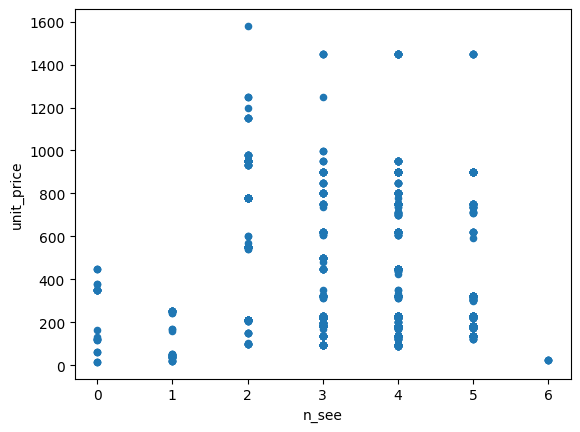

In [ ]:
#ดูว่าจำนวนคำว่าสี มีความสัมพันธ์กับ unit_price หรือไม่
df.plot(kind='scatter', x='n_see', y='unit_price')

#Aggregating and Summarizing Data

Summarizing Numerical Data

In [97]:
#หาผลรวมของยอดขาย (paid_price) ตลอดช่วงเวลาที่เราได้ข้อมูลมาใส่ตัวแปร total_revenue
total_revenue = df['paid_price'].sum()

In [ ]:
total_revenue

576289.82

In [ ]:
#หาค่าเฉลี่ย ค่ามัธยฐาน ค่าสูงสุด ค่าต่ำสุด และส่วนเบียงเบนมาตรฐาน ของยอด paid_price, shipping_fee_to_unit_price
df[['paid_price','shipping_fee_to_unit_price']].agg(['mean','median','max','min','std'])

,paid_price,shipping_fee_to_unit_price
mean,408.716184,0.334335
median,230.000000,0.294872
max,1550.000000,2.560000
min,14.770000,0.000000
std,326.137615,0.170578


In [ ]:
#สรุปจำนวนข้อมูล  ค่าเฉลี่ย ค่า sd ค่าต่ำสุด ค่า percentiles ที่ 10-90 และค่า ค่าสูงสุด ของทุกคอลัมน์ที่เป็นข้อมูลตัวเลข
df.describe(percentiles=np.arange(0.10,1.00,0.10))

,order_no,shipping_postcode,paid_price,unit_price,shipping_fee,shipping_fee_to_unit_price,n_see
count,1410.0,1410.0,1410.0,1410.0,1410.0,1410.0,1409.0
mean,335325053737120.125,46600.021277,408.716184,412.34734,114.219397,0.334335,3.541519
std,4429675376531.013672,27017.778831,326.137615,330.873667,71.893309,0.170578,1.168302
min,327742470082888.0,10100.0,14.77,15.0,0.0,0.0,0.0
10%,329134035144773.125,10510.0,95.0,95.0,34.45,0.158621,2.0
20%,330661326070827.0,20130.0,135.0,135.0,50.0,0.226667,2.6
30%,332262807527571.0,30130.0,180.0,180.0,64.0,0.247312,3.0
40%,333911829827652.625,34272.0,210.0,210.0,64.0,0.272694,4.0
50%,335181196451929.5,42130.0,230.0,230.0,109.0,0.294872,4.0
60%,336761260709755.625,50212.0,320.0,320.0,134.0,0.355556,4.0


In [ ]:
#ดูว่า unit_price กับ shipping_fee มี correlation กันมากน้อยแค่ไหน
df[['unit_price','shipping_fee']].corr()

,unit_price,shipping_fee
unit_price,1.000000,0.846417
shipping_fee,0.846417,1.000000


สังเกตว่า correlation มีค่าค่อนข้างสูง แปลว่ายิ่ง unit_price มาก shipping_fee มีแนวโน้มยิ่งมาก

# Summarizing Categorical Data

In [ ]:
#หาว่าแต่ละ column มีจำนวน unique values กี่ค่า
df.nunique()

order_no                      1140
lazada_sku                     247
create_dt                       60
cust_name_hash                 579
shipping_name_hash             333
shipping_addr_hash             869
shipping_province               74
shipping_district              453
shipping_postcode              463
tax_code_hash                   69
payment_method                  10
paid_price                     243
unit_price                      81
shipping_fee                   219
item_name                      142
item_variation                 255
item_category                   11
order_status                     3
cancel_return_initiator          2
cancel_return_reason            10
shipping_fee_to_unit_price     402
n_see                            7
dtype: int64

In [ ]:
#ดูว่าประเภทของสินค้า (item_category) มีประเภทอะไรบ้าง

In [ ]:
df['item_category'].value_counts()

สีทาบ้าน                   651
สีน้ำอะคริลิค              393
สีรองพื้นปูนเก่า           126
สีรองพื้นปูนใหม่กันด่าง     73
สีทาฝ้าเพดาน                70
อุปกรณ์อื่นๆ                28
สีรองพื้นปูนอเนกประสงค์     25
ทินเนอร์                    24
สีน้ำมัน                    12
น้ำมันสน                     3
สีรองพื้นกันสนิมเทา          1
Name: item_category, dtype: Int64

In [ ]:
#เปลี่ยน type เป็น category และสรุปข้อมูล
df['item_category'] = df['item_category'].astype('category')
df['payment_method'] = df['payment_method'].astype('category')
df['shipping_province'] = df['shipping_province'].astype('category')
df.describe(include='category')

,shipping_province,payment_method,item_category
count,2203,2203,2198
unique,75,11,11
top,กรุงเทพมหานคร/ Bangkok,COD,สีทาบ้าน
freq,228,1723,1188


#Groupby : Simple Aggregation Functions

In [ ]:
#หาค่าเฉลี่ย unit_price แยกรายประเภท item_category โดยทำเป็น Dataframe
df.groupby('item_category')['unit_price'].mean().to_frame('avg_unit_price')

,avg_unit_price
item_category,
ทินเนอร์,284.791667
น้ำมันสน,103.333333
สีทาบ้าน,368.63126
สีทาฝ้าเพดาน,252.685714
สีน้ำมัน,156.666667
สีน้ำอะคริลิค,477.653944
สีรองพื้นกันสนิมเทา,105.0
สีรองพื้นปูนอเนกประสงค์,542.4
สีรองพื้นปูนเก่า,533.833333


In [ ]:
#หายอดขายรวม (paid_price) ของสินค้าแต่ละประเภท (item_category)
df.groupby('item_category')['paid_price'].sum().sort_values()

item_category
สีรองพื้นกันสนิมเทา            105.0
น้ำมันสน                       310.0
อุปกรณ์อื่นๆ                  993.81
สีน้ำมัน                     1861.82
ทินเนอร์                     6829.78
สีรองพื้นปูนอเนกประสงค์     13388.37
สีทาฝ้าเพดาน                17604.51
สีรองพื้นปูนใหม่กันด่าง     43903.56
สีรองพื้นปูนเก่า            66688.76
สีน้ำอะคริลิค              186442.61
สีทาบ้าน                    237491.8
Name: paid_price, dtype: Float64

In [ ]:
#จะรู้ได้อย่างไรว่า มีกรณีที่ 1 order ซื้อสินค้ามากกว่า 1 ชิ้น
#จะรู้ได้อย่างไรว่า ค่าส่ง (shipping_fee) ที่มีเป็นของ order_no หนึ่งๆ หรือเป็น shipping_fee ที่คิดเกลี่ยไปให้สินค้าแต่ละชิ้นแล้ว

In [ ]:
#นับจำนวนแถวของแต่ละ order_no
df['order_no'].value_counts()

345840445016434    8
328297040399913    8
339807440382994    8
334032983846894    8
331370010078371    6
                  ..
336762915336070    1
336694902458568    1
335799609558568    1
335762810982506    1
350564875726281    1
Name: order_no, Length: 1751, dtype: Int64

In [ ]:
#เช็คว่าแต่ละ order_no มีจำนวนค่า shipping_fee ที่แตกต่างกันกี่ค่า
num_unique_fee_by_order = df.groupby('order_no')['shipping_fee'].nunique()

In [ ]:
num_unique_fee_by_order.sort_values()

order_no
327742470082888    1
342494171996821    1
342488318545374    1
342485041155665    1
342460609743557    1
                  ..
330698582302510    4
331370010078371    5
339451868168712    5
327845616538406    6
328297040399913    6
Name: shipping_fee, Length: 1751, dtype: int64

In [ ]:
#ลองดู order_no ที่มีมากกว่า 1 shipping fee
df[df['order_no'] == 330698582302510]

,order_no,lazada_sku,create_dt,cust_name_hash,shipping_name_hash,shipping_addr_hash,shipping_province,shipping_district,shipping_postcode,tax_code_hash,...,paid_price,unit_price,shipping_fee,item_name,item_variation,item_category,order_status,cancel_return_initiator,cancel_return_reason,shipping_fee_to_unit_price
249,330698582302510,1008780087_TH-2226250016,2020-10-11,77f0b655e851b72c0aa449cc3645536a,77f0b655e851b72c0aa449cc3645536a,4f3beb25938b53a72add0caafb2c1b45,กรุงเทพมหานคร/ Bangkok,พญาไท/ Phaya Thai,10400,d41d8cd98f00b204e9800998ecf8427e,...,934.22,950.0,175.63,สีรองพื้นปูนเก่า สูตรน้ำ เนื้อขาว ยี่ห้อ สคูลด...,กลุ่มผลิตภัณฑ์สีทา:สีรองพื้นปูนเก่า เนื้อขาว,สีรองพื้นปูนเก่า,Delivered,<NA>,<NA>,0.184874
250,330698582302510,1023476368_TH-2265522701,2020-10-11,77f0b655e851b72c0aa449cc3645536a,77f0b655e851b72c0aa449cc3645536a,4f3beb25938b53a72add0caafb2c1b45,กรุงเทพมหานคร/ Bangkok,พญาไท/ Phaya Thai,10400,d41d8cd98f00b204e9800998ecf8427e,...,19.67,20.0,0.0,"แปรงทาสี ขนาด 1""",Color Family:แปรงทาสี ขนาด 1 นิ้ว,อุปกรณ์อื่นๆ,Delivered,<NA>,<NA>,0.0
251,330698582302510,1023476368_TH-2265522701,2020-10-11,77f0b655e851b72c0aa449cc3645536a,77f0b655e851b72c0aa449cc3645536a,4f3beb25938b53a72add0caafb2c1b45,กรุงเทพมหานคร/ Bangkok,พญาไท/ Phaya Thai,10400,d41d8cd98f00b204e9800998ecf8427e,...,19.67,20.0,1.38,"แปรงทาสี ขนาด 1""",Color Family:แปรงทาสี ขนาด 1 นิ้ว,อุปกรณ์อื่นๆ,Delivered,<NA>,<NA>,0.069
252,330698582302510,1008908827_TH-2226774928,2020-10-11,77f0b655e851b72c0aa449cc3645536a,77f0b655e851b72c0aa449cc3645536a,4f3beb25938b53a72add0caafb2c1b45,กรุงเทพมหานคร/ Bangkok,พญาไท/ Phaya Thai,10400,d41d8cd98f00b204e9800998ecf8427e,...,118.0,120.0,20.34,ทินเนอร์ 3A อเนกประสงค์คุณภาพดี ยี่ห้อ สคูลดิโ...,กลุ่มผลิตภัณฑ์สีทา:ทินเนอร์ 3A,ทินเนอร์,Delivered,<NA>,<NA>,0.1695


จะเห็นว่า สินค้าที่ราคาสูง ค่าขนส่งจะสูงตาม แต่ยังไม่แน่ชัดว่า มีการเกลี่ยราคาค่าส่งรายสินค้าหรือเปล่าหรือว่าคิดแยกมาแต่แรกเลย

In [ ]:
#รวมรายได้จากลูกค้าแต่ละคน (cust_name_hash) เพื่อดูว่า ลูกค้าคนไหนที่จ่ายเยอะ (Top Spenders)
#ซึ่งข้อมูลนี้อาจจะทำไปให้ทีม CRM (Customer Relationship Management) ดูแลลูกค้ากลุ่มนี้เป็นพิเศษต่อไปได้

In [ ]:
#แบ่งกลุ่มตาม cust_name_hash แล้วรวม paid_price
revenue_by_cust = df.groupby('cust_name_hash')['paid_price'].sum()

In [ ]:
#หาว่าลูกค้า 10 Top Spenders มีใครบ้าง และแต่ละรายสั่งซื้อสินค้ารวมกี่บาท
revenue_by_cust.sort_values(ascending=False).head(10)

cust_name_hash
eee14345482c566e7d72e988280be983    18336.5
df64dc2eb4a0b85091dd31eb4923eaac    16087.8
43b633560f95a64dbe4ab5eef390d280    15212.5
980017891ff67cf8a20f23aa810e7b5a    13861.0
7cd85ec5761a0856c803fff6396bb36a    12627.5
cc5abf089bcdd1b95c32c769aa296622    12395.5
372e7fd78fec6208c0ffab76b8e7b959    12199.0
e8d8433622b25fb65e10a649b3c68d54    12072.0
b5bd71e84bf5fdf530d4ce4597bb6ddc    11314.5
f51d3f3feaf6d3d4e066ae03c78de189    11311.0
Name: paid_price, dtype: Float64

Groupby: Multiple Keys
สามารถสรุปข้อมูลแบบแบ่งกลุ่ม โดยเกณฑ์การแบ่งกลุ่มของเราอาจมาจากการพิจารณาหลาย columns ได้

In [ ]:
#หายอดรวม paid_price แบบแบ่งตามกลุ่ม item_category และ unit_price_group(อ้างอิงจาก df_sku_price )
df_sku_price.groupby(['item_category','unit_price_group'])['paid_price'].sum().to_frame('total_revenue')

total_revenue
item_category           unit_price_group               
ทินเนอร์                very cheap               933.08
                        cheap                     165.0
                        medium                      0.0
                        expensive               10650.0
                        very expensive              0.0
น้ำมันสน                very cheap                359.5
                        cheap                       0.0
                        medium                      0.0
                        expensive                   0.0
                        very expensive              0.0
สีทาบ้าน                very cheap             35920.39
                        cheap                  41863.23
                        medium                 77651.36
                        expensive             105593.14
                        very expensive        181234.17
สีทาฝ้าเพดาน            very cheap              4382.69
                        cheap                   1057.93
                        medium                  2796.04
                        expensive              15702.16
                        very expensive           2550.0
สีน้ำมัน                very cheap              1659.01
                        cheap                       0.0
                        medium                      0.0
                        expensive               1721.95
                        very expensive              0.0
สีน้ำอะคริลิค           very cheap              6639.15
                        cheap                   10547.7
                        medium                  26775.1
                        expensive              56624.34
                        very expensive         125715.9
สีรองพื้นกันสนิมเทา     very cheap                105.0
                        cheap                       0.0
                        medium                      0.0
                        expensive                   0.0
                        very expensive              0.0
สีรองพื้นปูนอเนกประสงค์ very cheap                  0.0
                        cheap                       0.0
                        medium                  5138.01
                        expensive               2322.75
                        very expensive         16679.62
สีรองพื้นปูนเก่า        very cheap                  0.0
                        cheap                  17015.08
                        medium                      0.0
                        expensive              23008.23
                        very expensive         53425.39
สีรองพื้นปูนใหม่กันด่าง very cheap              1385.25
                        cheap                   3099.87
                        medium                    250.0
                        expensive              62880.31
                        very expensive         15070.61
อุปกรณ์อื่นๆ            very cheap              1834.66
                        cheap                       0.0
                        medium                      0.0
                        expensive                   0.0
                        very expensive              0.0

ข้อมูลอ้างอิงจากใน Dataframe 'df_sku_price' ที่ทำการ .copyมาจากด้านบน

In [ ]:
### Groupby: Multiple Aggregations
#สามารถคำนวณค่าสถิติของ .groupby() ทีเดียวหลายๆ อย่างได้

In [ ]:
#หาจำนวน transactions และยอดรวม paid_price แบบแบ่งตามกลุ่ม item_category
df.groupby('item_category')['paid_price'].agg(['count','sum'])

,count,sum
item_category,,
ทินเนอร์,38,11748.08
น้ำมันสน,4,359.5
สีทาบ้าน,1188,442262.29
สีทาฝ้าเพดาน,97,26488.82
สีน้ำมัน,19,3380.96
สีน้ำอะคริลิค,444,226302.19
สีรองพื้นกันสนิมเทา,1,105.0
สีรองพื้นปูนอเนกประสงค์,40,24140.38
สีรองพื้นปูนเก่า,183,93448.7


#Visualizing Data

Basic One-Variable Plots

create_dt
2020-10-01    Axes(0.125,0.11;0.775x0.77)
2020-10-02    Axes(0.125,0.11;0.775x0.77)
2020-10-03    Axes(0.125,0.11;0.775x0.77)
2020-10-04    Axes(0.125,0.11;0.775x0.77)
2020-10-05    Axes(0.125,0.11;0.775x0.77)
                         ...             
2020-12-20    Axes(0.125,0.11;0.775x0.77)
2020-12-21    Axes(0.125,0.11;0.775x0.77)
2020-12-22    Axes(0.125,0.11;0.775x0.77)
2020-12-23    Axes(0.125,0.11;0.775x0.77)
2020-12-24    Axes(0.125,0.11;0.775x0.77)
Name: paid_price, Length: 85, dtype: object

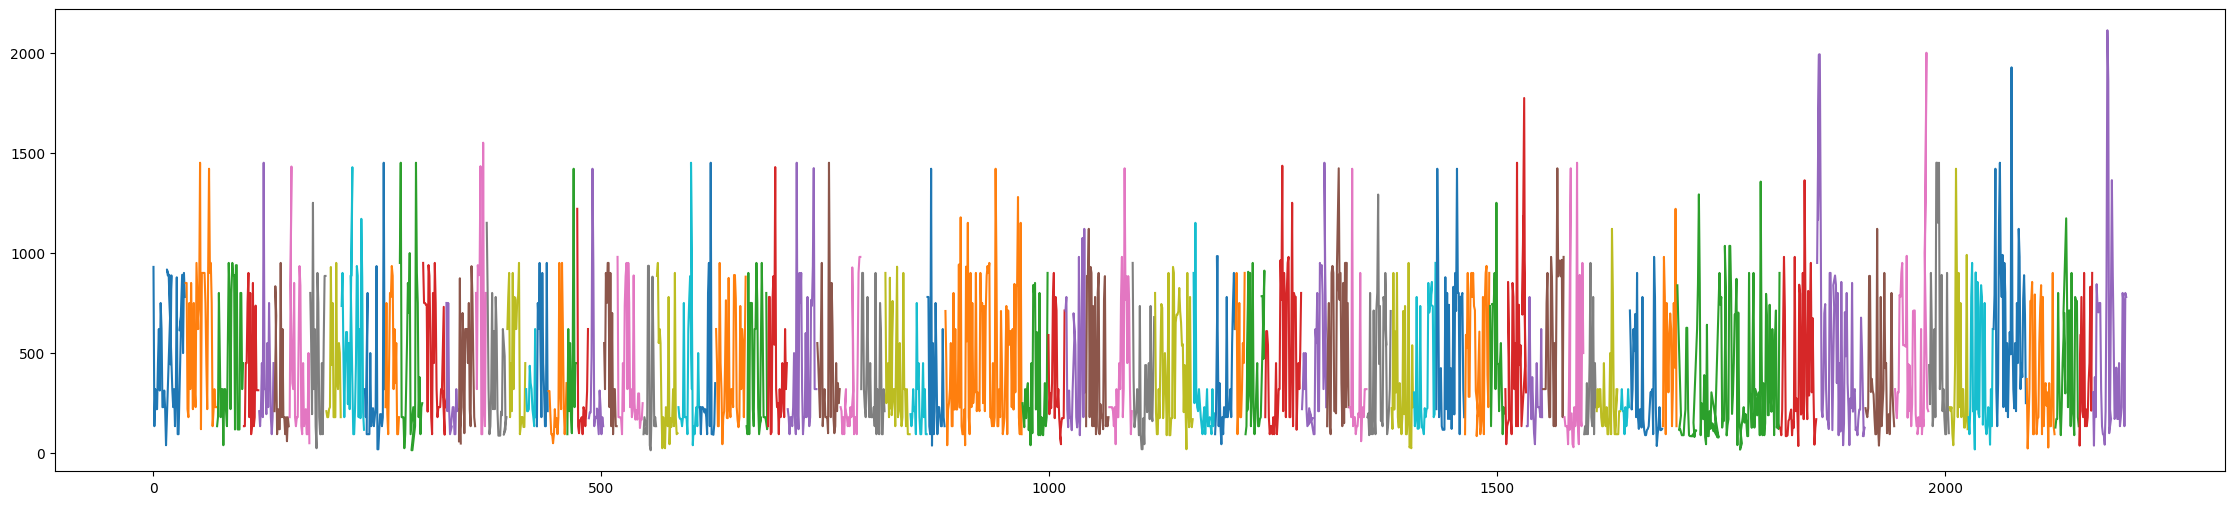

In [21]:
#สร้างกราฟเส้นแสดง paid_price เรียงจาก transaction แรกไปสุดท้าย
df.groupby('create_dt')['paid_price'].plot(kind='line',figsize=(28,6))

<Axes: ylabel='Frequency'>

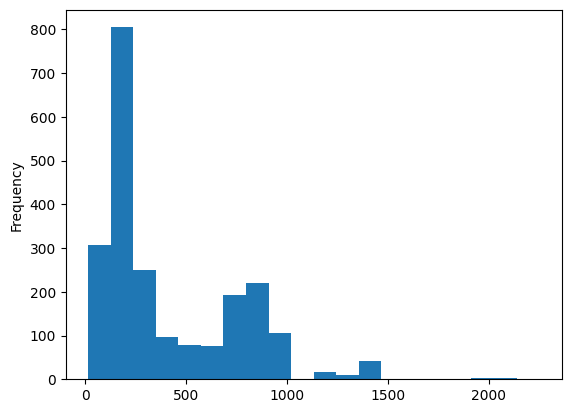

In [22]:
#สร้าง Histogram ของ unit_price โดยแบ่งเป็น 20 bins ที่มีขนาด bin เท่าๆ กัน
df['unit_price'].plot(kind='hist',bins=20)

<Axes: >

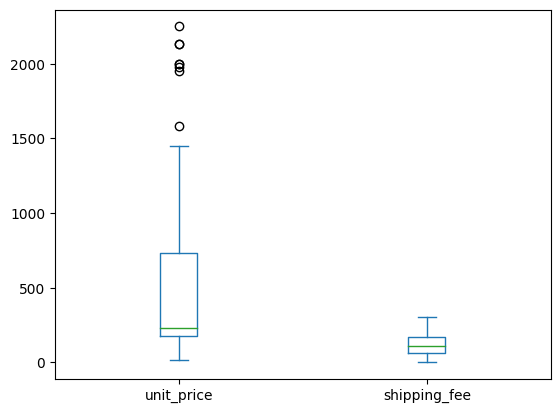

In [23]:
#สร้าง Boxplot ยอด unit_price กับ shipping_fee
df[['unit_price','shipping_fee']].plot(kind='box')

#Groupby Plots (Categorical x Numerical)

In [24]:
#print มาดูว่า item_category มีชื่ออะไรบ้าง (กด Run ได้เลยครับ)
df['item_category'].unique()

array(['สีรองพื้นปูนเก่า', 'สีน้ำอะคริลิค', 'อุปกรณ์อื่นๆ', 'สีน้ำมัน',
       'สีทาฝ้าเพดาน', 'สีรองพื้นปูนใหม่กันด่าง', 'ทินเนอร์', 'น้ำมันสน',
       'สีรองพื้นปูนอเนกประสงค์', 'สีทาบ้าน', nan, 'สีรองพื้นกันสนิมเทา'],
      dtype=object)

In [26]:
#สร้าง column 'item_category' ใหม่เป็นภาษาอังกฤษ
#สร้าง dictionary ที่มี key เป็นคำไทย และ value เป็นคำอังกฤษ
thai_to_eng = {
    'สีรองพื้นปูนเก่า': 'Old Contact Primer',
    'สีน้ำอะคริลิค': 'Acrylic Paint',
    'อุปกรณ์อื่นๆ': 'Others',
    'สีน้ำมัน': 'Oil Paint',
    'สีทาฝ้าเพดาน': 'Ceiling Paint',
    'สีรองพื้นปูนใหม่กันด่าง': 'Alkali Resisting Primer',
    'ทินเนอร์': 'Tinner',
    'น้ำมันสน': 'Turpentine',
    'สีรองพื้นปูนอเนกประสงค์': 'Multi-Purpose Primer',
    'สีทาบ้าน': 'House Paint',
    'สีรองพื้นกันสนิมเทา': 'Grey Primer'
}

In [27]:
df['item_category_eng']=df['item_category'].map(thai_to_eng)

In [30]:
df[['item_category_eng','item_category']].head(5)

,item_category_eng,item_category
0,Old Contact Primer,สีรองพื้นปูนเก่า
1,Acrylic Paint,สีน้ำอะคริลิค
2,Acrylic Paint,สีน้ำอะคริลิค
3,Acrylic Paint,สีน้ำอะคริลิค
4,Acrylic Paint,สีน้ำอะคริลิค


In [42]:
#สร้างbar chart สรุปยอดขายรวม (paid_price) แบ่งตามประเภทสินค้า (item_category_eng)
revenue_by_cat = df.groupby('item_category_eng')['paid_price'].sum()

<Axes: xlabel='item_category_eng'>

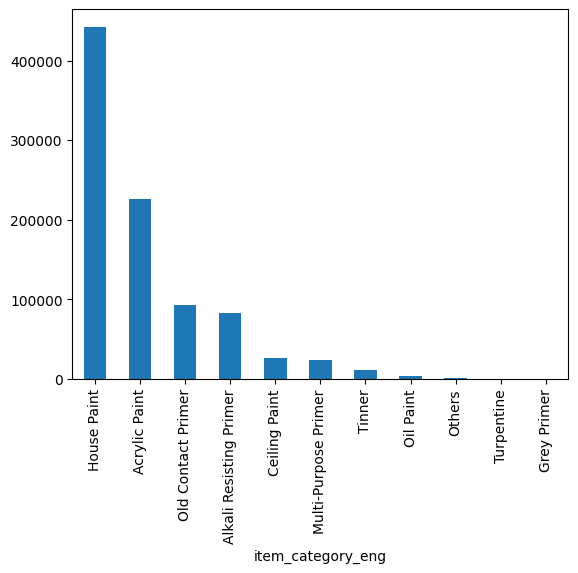

In [45]:
revenue_by_cat.sort_values(ascending=False).plot(kind='bar')

<Axes: ylabel='paid_price'>

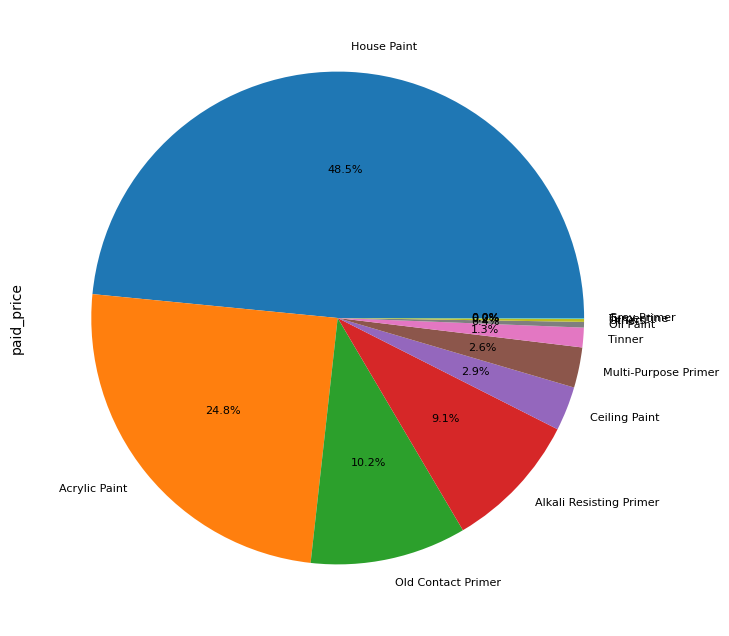

In [49]:
#สร้าง pie chart ยอดขายรวมแยกรายประเภทสินค้า
revenue_by_cat.sort_values(ascending=False).plot(kind='pie', figsize=(8,8), autopct='%.1f%%', fontsize=8)

## Scatter Plots (Numerical x Numerical)

<Axes: xlabel='unit_price', ylabel='shipping_fee'>

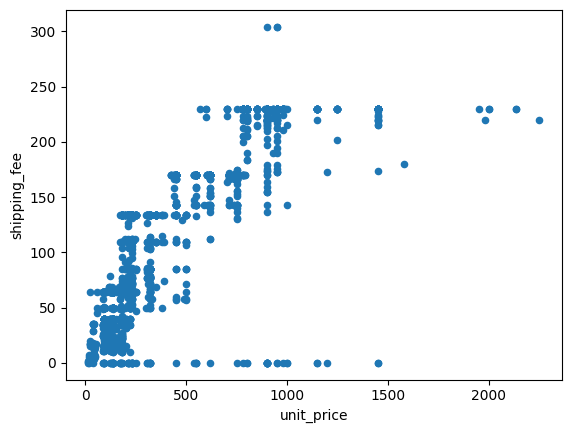

In [80]:
#สร้าง scatter plot แสดงความสัมพันธ์ระหว่าง unit_price กับ shipping_fee
df.plot(kind='scatter', x='unit_price', y='shipping_fee')

 จาก scatter plot จะเห็นว่า shipping_fee มีแนวโน้มสูง เมื่อ unit_price สูงสอดคล้องกับค่า correlation